# *******Detecting Ships in Satellite Images*******

In [1]:
print(format('my name is mohamed sobhi and iam study in faculty in navigation science and space technology', '*^99'))    
print(format('Identifying Ship in Satellite Images ','*^65'))
print(format('Package: tensorfow ','*^65'))            
print(format('Algorithm: CNN Model ','*^65'))            
print(format('Dataset: ships from satellite data.', '*^65'))    
print(format('Model selection: keras', '*^65'))

***my name is mohamed sobhi and iam study in faculty in navigation science and space technology****
**************Identifying Ship in Satellite Images **************
***********************Package: tensorfow ***********************
**********************Algorithm: CNN Model **********************
***************Dataset: ships from satellite data.***************
*********************Model selection: keras**********************


In [1]:
#import libararies
import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
%matplotlib inline

In [2]:
#read data from json
shipsnet = pd.read_json("shipsnet.json")
shipsnet.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [3]:
shipsnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [4]:
len(shipsnet["data"].iloc[0])

19200

In [5]:
shipsnet.shape

(4000, 4)

In [6]:
shipsnet["labels"].value_counts()

0    3000
1    1000
Name: labels, dtype: int64

In [7]:
x = np.concatenate(shipsnet["data"].values)
print(f"Min RGB value: {min(x)}.")
print(f"Max RGB value: {max(x)}.")
print(f"NaN values: {np.isnan(x).sum()}.")

Min RGB value: 1.
Max RGB value: 255.
NaN values: 0.


In [8]:
#Normalize data 
shipsnet["normalised_data"] = shipsnet["data"].apply(lambda x : np.array(x) / 255)

In [9]:
#reshape data (rearrange the data)
shipsnet["reshaped_data"] = shipsnet["normalised_data"].apply(lambda x : x.reshape([3, 80, 80]).transpose([1, 2, 0]))

In [10]:
shipsnet = shipsnet[["reshaped_data", "labels"]]
shipsnet.head() 

,reshaped_data,labels
0,"[[[0.3215686274509804, 0.3686274509803922, 0.3...",1
1,"[[[0.2980392156862745, 0.33725490196078434, 0....",1
2,"[[[0.49019607843137253, 0.5333333333333333, 0....",1
3,"[[[0.4, 0.4117647058823529, 0.3411764705882353...",1
4,"[[[0.3058823529411765, 0.3215686274509804, 0.2...",1


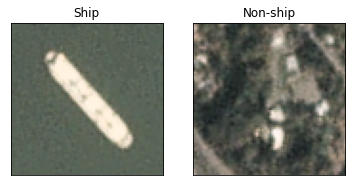

In [11]:
#plot the images
plt.subplot(121)
plt.title("Ship")
plt.xticks([])
plt.yticks([])
plt.imshow(shipsnet["reshaped_data"][0])

plt.subplot(122)
plt.title("Non-ship")
plt.xticks([])
plt.yticks([])
plt.imshow(shipsnet["reshaped_data"][3500])

plt.show()

In [12]:
#split data into x,y
X = shipsnet["reshaped_data"]
y = shipsnet["labels"]



In [13]:
#split data into train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)

x_train shape (3200,)
x_test shape (800,)


In [15]:
# convert numpy arrays of type float for Keras.
X_train = np.array(X_train.tolist()).astype(float)
X_test = np.array(X_test.tolist()).astype(float)
y_train = np.array(y_train.tolist()).astype(float)
y_test = np.array(y_test.tolist()).astype(float)

In [16]:
#Initialisation of DL model.
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Activation
import tensorflow as tf

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [18]:
#compile the model
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
# fit the model.
history = model.fit(
      X_train,
      y_train,
      epochs=10,
      validation_data=(X_test, y_test),
      )

Epoch 1/10
100/100 [==============================] - 5s 14ms/step - loss: 0.4098 - acc: 0.8275 - val_loss: 0.3021 - val_acc: 0.8625
Epoch 2/10
100/100 [==============================] - 1s 12ms/step - loss: 0.2798 - acc: 0.8872 - val_loss: 0.2472 - val_acc: 0.8838
Epoch 3/10
100/100 [==============================] - 1s 11ms/step - loss: 0.2335 - acc: 0.9044 - val_loss: 0.2364 - val_acc: 0.9000
Epoch 4/10
100/100 [==============================] - 1s 11ms/step - loss: 0.1891 - acc: 0.9197 - val_loss: 0.1684 - val_acc: 0.9388
Epoch 5/10
100/100 [==============================] - 1s 11ms/step - loss: 0.1549 - acc: 0.9350 - val_loss: 0.1469 - val_acc: 0.9425
Epoch 6/10
100/100 [==============================] - 1s 11ms/step - loss: 0.1262 - acc: 0.9484 - val_loss: 0.1315 - val_acc: 0.9525
Epoch 7/10
100/100 [==============================] - 1s 11ms/step - loss: 0.1003 - acc: 0.9616 - val_loss: 0.1041 - val_acc: 0.9663
Epoch 8/10
100/100 [==============================] - 1s 11ms/step - 

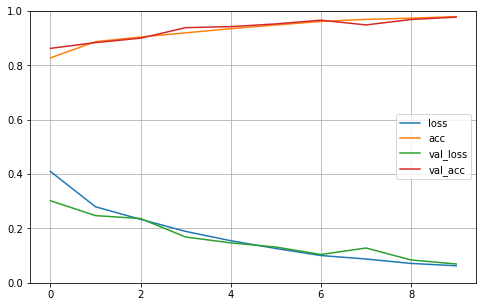

In [20]:
#plot acc,loss
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
#predict the model and calculate acc
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions.round()))
print(confusion_matrix(y_test, predictions.round()))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       591
         1.0       0.95      0.97      0.96       209

    accuracy                           0.98       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.98      0.98      0.98       800

[[580  11]
 [  7 202]]


# Great Job!